In [1]:
import keras
from keras.preprocessing.image import  ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
 
import matplotlib.pyplot as plt


In [2]:
training_data="drive/My Drive/train"

In [3]:
val_data="drive/My Drive/val"

In [4]:
def plot_images(images_arr):
  fig, axes=plt.subplots(1,5, figsize=(20,20))
  axes= axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()


In [5]:
training_datagen= ImageDataGenerator(rescale=.1/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

train_data= training_datagen.flow_from_directory(training_data, target_size=(150,150), batch_size=32, class_mode='binary')


Found 1951 images belonging to 4 classes.


In [6]:
train_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [7]:
valid_datagen= ImageDataGenerator(rescale=.1/255)

valid_data= training_datagen.flow_from_directory(val_data, target_size=(150,150), batch_size=32, class_mode='binary')



Found 324 images belonging to 4 classes.


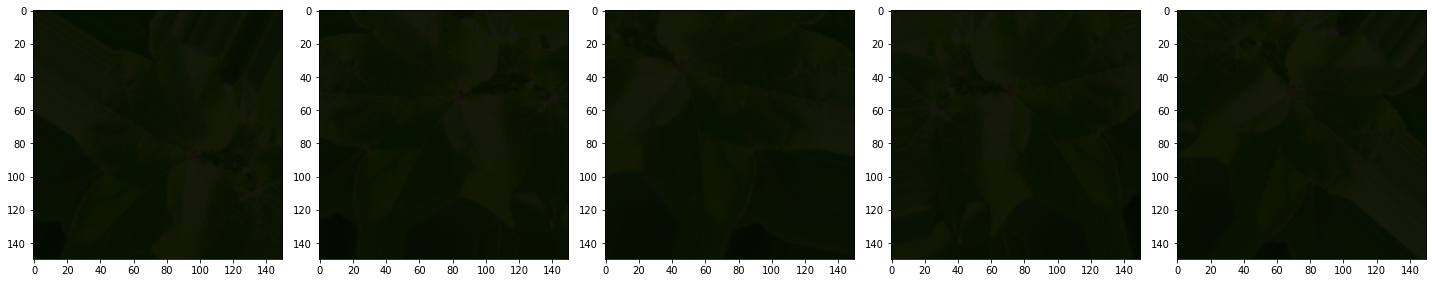

In [8]:
images=[train_data[0][0][0] for i in range(5)]
plot_images(images)

In [9]:
model_path="drive/My Drive/cott_dis_pred.h5"
checkpoint=ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode=max)
callbacks_list=[checkpoint]


In [10]:
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])
 
 
# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])                       

In [11]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [12]:
history= cnn_model.fit(train_data,
                       epochs=500,
                       verbose=1,
                       validation_data= valid_data,
                       callbacks= callbacks_list
                       )

Epoch 1/500
61/61 [==============================] - 758s 12s/step - loss: 1.3352 - accuracy: 0.4251 - val_loss: 1.3075 - val_accuracy: 0.3210

Epoch 00001: val_accuracy improved from -inf to 0.32099, saving model to drive/My Drive/cott_dis_pred.h5
Epoch 2/500
61/61 [==============================] - 25s 410ms/step - loss: 1.2305 - accuracy: 0.4406 - val_loss: 1.1421 - val_accuracy: 0.4414

Epoch 00002: val_accuracy improved from 0.32099 to 0.44136, saving model to drive/My Drive/cott_dis_pred.h5
Epoch 3/500
61/61 [==============================] - 25s 407ms/step - loss: 1.1064 - accuracy: 0.4978 - val_loss: 1.0773 - val_accuracy: 0.4907

Epoch 00003: val_accuracy improved from 0.44136 to 0.49074, saving model to drive/My Drive/cott_dis_pred.h5
Epoch 4/500
61/61 [==============================] - 25s 407ms/step - loss: 1.0453 - accuracy: 0.5415 - val_loss: 0.9718 - val_accuracy: 0.6019

Epoch 00004: val_accuracy improved from 0.49074 to 0.60185, saving model to drive/My Drive/cott_dis_

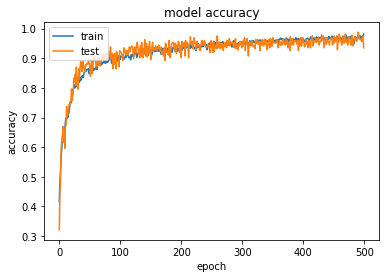

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

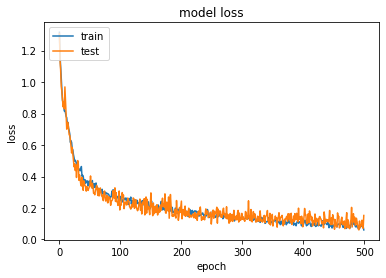

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [16]:
#history.history

In [17]:
cnn_model.save('cott_pred_500.h5')